In [1]:
# Importing libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline

In [2]:
# Downloading pretrained model
MODEL_NAME = "runwayml/stable-diffusion-v1-5"
pipeline = StableDiffusionPipeline.from_pretrained(MODEL_NAME, revision='fp16', dtype=torch.float16)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.
/home/bootcamp/miniconda3/envs/btcp/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
# Send the model to GPU
device = torch.device("cuda:0")
pipeline_runway = pipeline.to(device)

In [4]:
'''Prompts to send to Stable Diffusion model. 
  Tip: A more sophisticated prompt leads to the generation of higher quality images.'''
  
prompts = [
  "A cat is outside",
  "A cat standing on the floor",
  "A running dog",
  "Dog is at home",
  "Hen is eating",
  "Flying kite",
  "Peacock is walking",
  "Folding chair", 
  "Computer desk",
  "Dining table",
  "A man is riding a horse on the moon, photorealistic",
  "A man with a hat is riding a horse on the surface of the moon, photorealistic"
  ]


In [5]:
images = pipeline_runway(prompts, num_images_per_prompt=1, output_type="numpy").images

  0%|          | 0/50 [00:00<?, ?it/s]

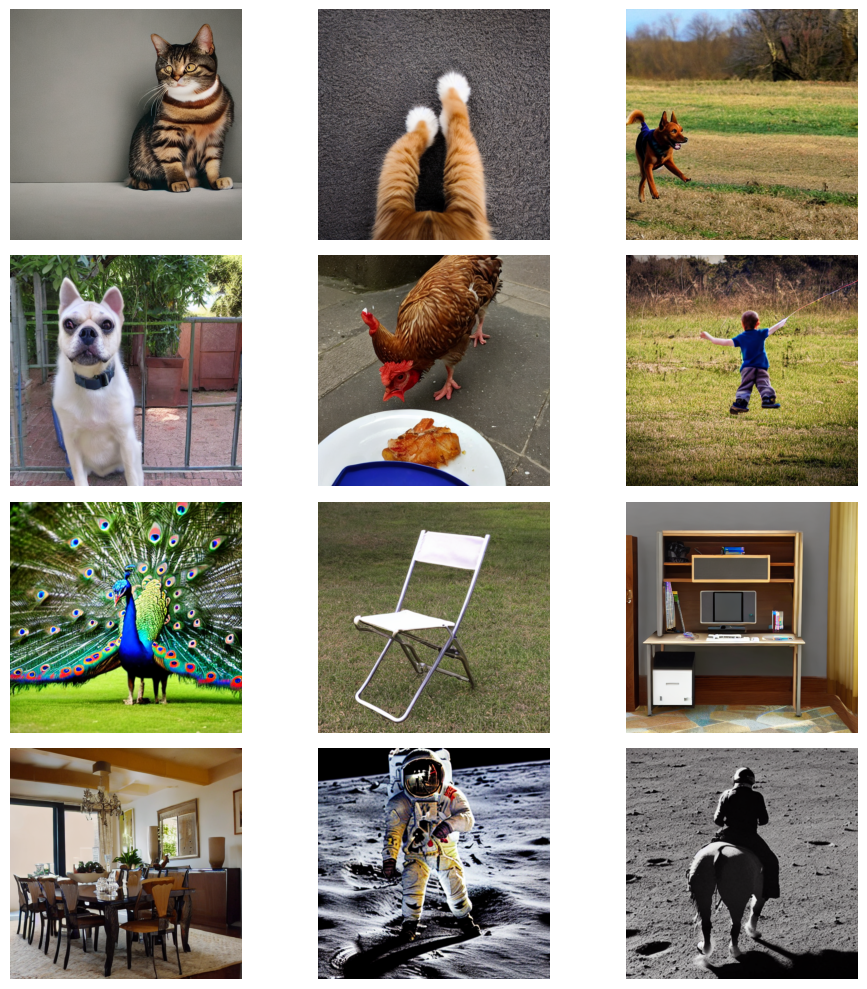

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(10, 10))

# Loop through the images and plot them in the subplots
for i, ax in enumerate(axes.flat):
    if i < len(images):
        image = plt.imread(images[i]) if isinstance(images[i], str) else images[i]
        ax.imshow(image)
        ax.axis('off')
    else:
        ax.axis('off')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()
